# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

Link da base: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
Escolhi essa base pois tenho visto e ouvido a respeito de muitos casos de depressão atualmente, principalmente entre adolescentes, o que muitas vezes leva ao suicídio.
Achei interessante poder analisar se essa é realmente uma prática que tem aumentado ao longo dos últimos anos, principalmente no Brasil.
Essa base, aparentemente já passou por vários pré processamentos, pois já possui as faixas etárias categorizadas por geração e possui uma coluna que é a concatenação do Pais e do Ano, provavelmente criada para facilitar análises.

A maioria das minhas análises para esse projeto foram feitas utilizando os dados referentes ao Brasil e focando nos últimos 5 anos coletados.

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua ou discreta.


A base possui informações de vários países entre os anos de 1985 e 2016.
Variáveis a serem trabalhadas:
- Nome do país
- Ano
- Sexo (discreta)
- Faixa etária (contínua) - Esse dado já está separado nas seguintes faixas: 5-14, 15-24, 25-34, 35-54, 55-74 e acima de 75.
- Qtde de suidicios a cada 100 mil habitantes (contínua)
- Número de suicidios (contínua)
- PIB do país (por ano) (contínua)
- PIB do pais (per capita) (contínua)

Variáveis não utilizadas:
- Country/year
- Generation
- IDH do país
- População

### 2) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [191]:
#Fazendo a leitura da base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('suicide.csv', encoding='utf-8')
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [192]:
# A base possui 27820 linhas.
len(df)

# Tipos: object (string), inteiro e float
df.dtypes

# Features: Possui 12 features (colunas)

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [193]:
#Renomeando colunas removendo espaços e caracteres especiais
df.columns = ['country', 'year', 'sex', 'age', 'suicides', 'population', 'suicides_per_100k', 'country_year', 'hdi_year', 'gdp_year', 'gdp_per_capita', 'generation']

In [194]:
#Existem valores nulos apenas na coluna HDI
df.isnull().any()
print(df)

          country  year     sex          age  suicides  population  \
0         Albania  1987    male  15-24 years        21      312900   
1         Albania  1987    male  35-54 years        16      308000   
2         Albania  1987  female  15-24 years        14      289700   
3         Albania  1987    male    75+ years         1       21800   
4         Albania  1987    male  25-34 years         9      274300   
5         Albania  1987  female    75+ years         1       35600   
6         Albania  1987  female  35-54 years         6      278800   
7         Albania  1987  female  25-34 years         4      257200   
8         Albania  1987    male  55-74 years         1      137500   
9         Albania  1987  female   5-14 years         0      311000   
10        Albania  1987  female  55-74 years         0      144600   
11        Albania  1987    male   5-14 years         0      338200   
12        Albania  1988  female    75+ years         2       36400   
13        Albania  1

In [195]:
#Converter o gdp_for_year para float
gdp_year_float = []

for i in range(0, len(df)):
    gdp_year_float.append(df.iloc[i]['gdp_year'].replace(",", ""))

gdp_year_float = [float(i) for i in gdp_year_float]
df['gdp_year_new'] = gdp_year_float


In [196]:
#Converter os valores de male/female para 0 e 1

df["sex_binary"] = df["sex"].apply(lambda x: 1 if x == "female" else 0)
df[["sex_binary", "sex"]]

df["sex"] = df["sex_binary"]

In [197]:
df.describe()

,year,sex,suicides,population,suicides_per_100k,hdi_year,gdp_per_capita,gdp_year_new,sex_binary
count,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,0.500000,242.574407,1.844794e+06,12.816097,0.776601,16866.464414,4.455810e+11,0.500000
std,8.469055,0.500009,902.047917,3.911779e+06,18.961511,0.093367,18887.576472,1.453610e+12,0.500009
min,1985.000000,0.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000,4.691962e+07,0.000000
25%,1995.000000,0.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000,8.985353e+09,0.000000
50%,2002.000000,0.500000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000,4.811469e+10,0.500000
75%,2008.000000,1.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000,2.602024e+11,1.000000
max,2016.000000,1.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000,1.812071e+13,1.000000


### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

In [198]:
#Criando um dataframe apenas com dados do Brasil

df_brasil = df[df['country']=='Brazil']


#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


Na base geral, 76.89 % de suicidios foram cometidos por homens e 23.11 % por mulheres
No Brasil, 78.37 % de suicidios foram cometidos por homens e 21.63 % por mulheres


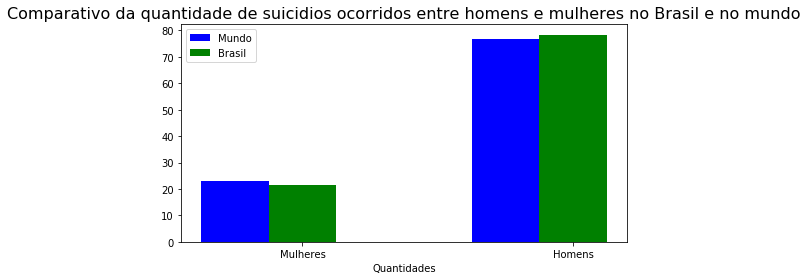

In [235]:
# Nesse bloco, calculo a porcentagem de suicidios de mulheres x homens
# Como a base está agrupada, é necessário somar as quantidades de cada um para obter a porcentagem

# Percentual de Mulheres e homens na base geral
total_mulheres = sum(df[df['sex'] == 1].suicides)
total_homens = sum(df[df['sex'] == 0].suicides)
total_geral = total_mulheres + total_homens

percentual_mulheres = round((total_mulheres / total_geral) * 100, 2)
percentual_homens = round((total_homens / total_geral) * 100, 2)

print('Na base geral,', percentual_homens, '% de suicidios foram cometidos por homens e', percentual_mulheres, '% por mulheres')

# Percentual de Mulheres e homens apenas no Brasil
total_mulheres_br = sum(df_brasil[df_brasil['sex'] == 1].suicides)
total_homens_br = sum(df_brasil[df_brasil['sex'] == 0].suicides)
total_geral_br = total_mulheres_br + total_homens_br

percentual_mulheres_br = round((total_mulheres_br / total_geral_br) * 100, 2)
percentual_homens_br = round((total_homens_br / total_geral_br) * 100, 2)

print('No Brasil,', percentual_homens_br, '% de suicidios foram cometidos por homens e', percentual_mulheres_br, '% por mulheres')


# Grafico comparando Percentual de homens e mulheres no Brasil e no mundo
valores_mundo = [percentual_mulheres, percentual_homens]
valores_brasil = [percentual_mulheres_br, percentual_homens_br]

barWidth=0.25

r1 = np.arange(len(valores_mundo))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(8, 4))
plt.bar(r1, valores_mundo, color="blue", width = barWidth, label="Mundo")
plt.bar(r2, valores_brasil, color="green", width = barWidth, label="Brasil")
plt.xlabel('Quantidades')
plt.xticks([r + barWidth for r in range(len(valores_mundo))], ['Mulheres', 'Homens'])
plt.legend()
plt.title('Comparativo da quantidade de suicidios ocorridos entre homens e mulheres no Brasil e no mundo', fontsize=16)
plt.show()

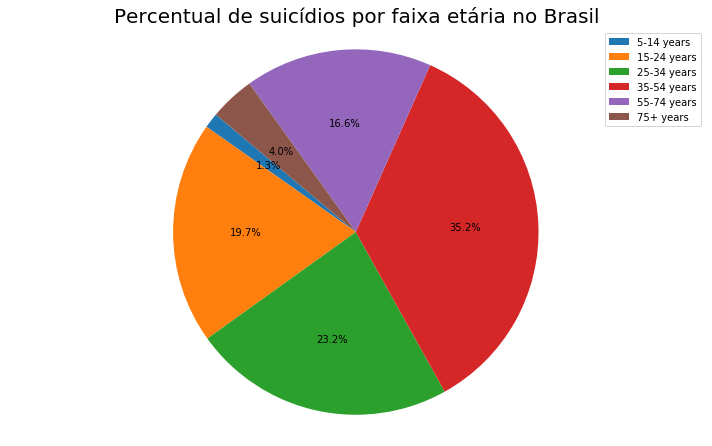

In [233]:
# Percentual dividido por todas as faixas etárias no Brasil

def obterPercentualIdades(label):
    geral = sum(df_brasil.suicides)
    return sum(df_brasil[df_brasil['age'] == label].suicides) / geral * 100;

legendas = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
valores = []

for x in legendas:
  valores.append(obterPercentualIdades(x))

plt.figure(figsize=(10, 6))
plt.pie(valores, autopct='%1.1f%%', shadow=False, startangle=140)
plt.legend(patches, legendas, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Percentual de suicídios por faixa etária no Brasil', fontsize=20)
plt.show()

#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


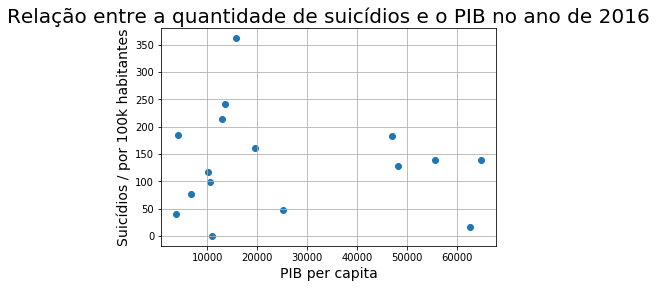

In [236]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

# Verificando apenas países que tenham análise no ultimo ano (2016)
# Vamos verificar se o PIB desse ano foi proporcional à quantidade de suicídios no país

df_2016 = df[df['year'] == 2016]

countries = df_2016['country'].unique()

totais_taxa = []

for x in countries:
    totais_taxa.append(sum(df_2016[df_2016['country'] == x].suicides_per_100k))
        
gdps = df_2016['gdp_per_capita'].unique()
    
x = gdps # pib dos países 
y = totais_taxa # taxa de suicidio dos países
 
# plot grafico de dispersao
plt.scatter(x, y)
plt.xlabel('PIB per capita', fontsize=14)
plt.ylabel('Suicídios / por 100k habitantes', fontsize=14)
plt.title('Relação entre a quantidade de suicídios e o PIB no ano de 2016', fontsize=20)
plt.grid(True)
 


#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



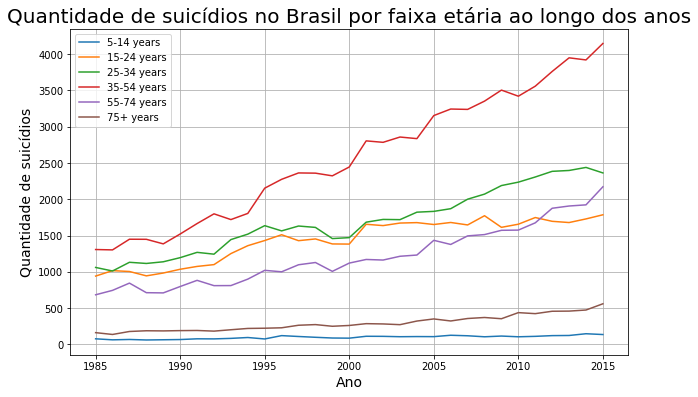

In [237]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
# Correlação entre faixa etária e ano

anos = df_brasil['year'].unique()
valores_menor_14 = []
valores_menor_24 = []
valores_menor_34 = []
valores_menor_54 = []
valores_menor_74 = []
valores_maior_75 = []

for x in anos:
  df_ano_corrente = df_brasil[df_brasil['year'] == x]
  valores_menor_14.append(sum(df_ano_corrente[df_ano_corrente['age'] == '5-14 years'].suicides))
  valores_menor_24.append(sum(df_ano_corrente[df_ano_corrente['age'] == '15-24 years'].suicides))
  valores_menor_34.append(sum(df_ano_corrente[df_ano_corrente['age'] == '25-34 years'].suicides))
  valores_menor_54.append(sum(df_ano_corrente[df_ano_corrente['age'] == '35-54 years'].suicides))
  valores_menor_74.append(sum(df_ano_corrente[df_ano_corrente['age'] == '55-74 years'].suicides))
  valores_maior_75.append(sum(df_ano_corrente[df_ano_corrente['age'] == '75+ years'].suicides))    

plt.figure(figsize=(10, 6))
plt.plot(anos,valores_menor_14,label='5-14 years')
plt.plot(anos,valores_menor_24,label='15-24 years')
plt.plot(anos,valores_menor_34,label='25-34 years')
plt.plot(anos,valores_menor_54,label='35-54 years')
plt.plot(anos,valores_menor_74,label='55-74 years')
plt.plot(anos,valores_maior_75,label='75+ years')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Quantidade de suicídios', fontsize=14)
plt.legend()
plt.title('Quantidade de suicídios no Brasil por faixa etária ao longo dos anos', fontsize=20)
plt.grid(True)
plt.show()


In [204]:
# Segundo par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
# Criar um gráfico de barras e linhas com a quantidade de suicidios e o PIB anual do país, comparando ao longodos anos analisados


# Correlação entre faixa etária e ano

In [6]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

# Criar um gráfico de barras com a quantidade de suicidios e o IDH do país (quando este for informado)

### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*

In [ ]:
1) Falando de Brasil, 